<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-vallesda/blob/main/DAwP_Modulo2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semana 5: Data Analysis with Python

##**Nombre**: David Valles
##**Matricula**: A01191310

##*Modulo 2: Data Wrangling*##

**Learning Objectives**

*   Identify and handle missing values
*   Data Formatting
*   Data Normalization
*   Data Binning



**Data Pre-processing**

The process of converting or mapping data from the initial "raw" form into anohter format, in order to prepare the data for further analysis.

**Data Normalization**

Is a way to bring all data into a similar range, for more useful comparison.

**Data Binning**

Binning creates a bigger categories from a set of numerical values. Useful for comparison between groups of data

**How to deal with missing data?**



*  Check with the data collection source. (Can you get more data?)  

*  Drop the missing values (drop variable/feature or data entry) (best for large data sets)

* Replace the missing values? (use average, use frequency/mode, use a function)

* Leave it as missing data



In [ ]:
# to drop a missing value use panda function dropna()
# axis=0 drops entire row
# axis=1 drops entire column
# dataframes.dropna()

# example
# inplace = true -> modifys df
# df.dropna(subset=["price"], axis=0, inplace=true)
# df.dropna(subset=["price"], axis=0)

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pylab as plt



In [6]:
filename = "sample_data/auto.csv"

In [7]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [8]:
df = pd.read_csv(filename, names = headers)

In [9]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
missing_values = df.isnull()
missing_values.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
for column in missing_values.columns.values.tolist():
  print(column)
  print(missing_values[column].value_counts())
  print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

**Replace by mean:**

*  "normalized-losses": 41 missing data, replace them with mean



*  "stroke": 4 missing data, replace them with mean
*  "bore": 4 missing data, replace them with mean
* "horsepower": 2 missing data, replace them with mean
* "peak-rpm": 2 missing data, replace them with mean


**Replace by frequency:**

* "num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur


**Drop the whole row:**

*  "price": 4 missing data, simply delete the whole row
Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

Replace by Mean

In [21]:
avg_norm_loss = df["normalized-losses"].astype("float").mean()
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [20]:
avg_bore = df["bore"].astype("float").mean()
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [22]:
avg_horsepower = df["horsepower"].astype("float").mean()
print("Average of horsepower: ", avg_horsepower)

Average of horsepower:  104.25615763546799


In [23]:
avg_peak_rpm = df["peak-rpm"].astype("float").mean()
print("Average of peak-rpm", avg_peak_rpm)

Average of peak-rpm 5125.369458128079


In [27]:
# Question 1 replace stroke with mean value
avg_stroke = df["stroke"].astype("float").mean()
print("Average stroke:", avg_stroke)

Average stroke: 3.255422885572139


In [28]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

Replace by frequency


In [31]:
doors_mode = df["num-of-doors"].value_counts().idxmax()
doors_mode

'four'

In [32]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [33]:
df["num-of-doors"].replace(np.nan, doors_mode, inplace=True)

Drop row

In [34]:
df.dropna(subset=["price"], axis=0, inplace=True)


In [35]:
df.reset_index(drop=True, inplace=True)

In [36]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Data Format**

In [39]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [40]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

**Data Standardization**


Data is usually collected from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)

What is standardization?

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

Example

Transform mpg to L/100km:

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.

We will need to apply data transformation to transform mpg into L/100km.

The formula for unit conversion is:

L/100km = 235 / mpg

We can do many mathematical operations directly in Pandas.

In [41]:
 df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [42]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [50]:
# Question 2
#According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".

df["highway-mpg"] = df["city-L/100km"]

df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

df.dropna(subset=["city-L/100km"], axis=0, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,highway-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,11.190476,13495.0,11.190476,11.190476,11.190476,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,11.190476,16500.0,11.190476,11.190476,11.190476,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,12.368421,16500.0,12.368421,12.368421,12.368421,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,9.791667,13950.0,9.791667,9.791667,9.791667,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,13.055556,17450.0,13.055556,13.055556,13.055556,13.055556


**Why normalization?**

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

In [51]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [52]:
# Question 3
# Normalize column height
df['height'] = df['height'] / df['height'].max()

In [53]:
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


**Why binning?**
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

In [54]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

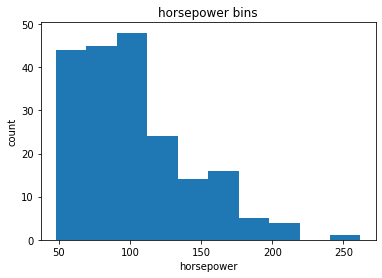

In [55]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [56]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [57]:
group_names = ['Low', 'Medium', 'High']

In [58]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [59]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

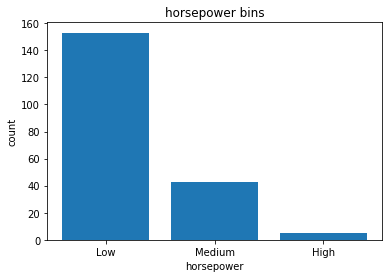

In [60]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

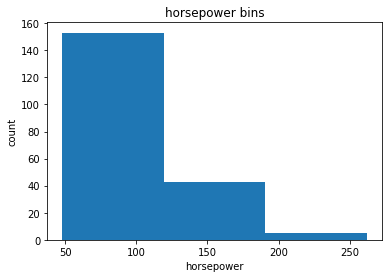

In [61]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

**What is an indicator variable?**


An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Why we use indicator variables?

We use indicator variables so we can use categorical variables for regression analysis in the later modules.

In [62]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'highway-L/100km',
       'highway-L/100km', 'highway-L/100km', 'horsepower-binned'],
      dtype='object')

In [63]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [65]:
dummy_variable_1.tail()

,diesel,gas
196,0,1
197,0,1
198,0,1
199,1,0
200,0,1


In [69]:
df[['fuel-type']]

,fuel-type
0,gas
1,gas
2,gas
3,gas
4,gas
...,...
196,gas
197,gas
198,gas
199,diesel


In [70]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()


,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [71]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [72]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,highway-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,21,11.190476,13495.0,11.190476,11.190476,11.190476,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,21,11.190476,16500.0,11.190476,11.190476,11.190476,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,19,12.368421,16500.0,12.368421,12.368421,12.368421,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,24,9.791667,13950.0,9.791667,9.791667,9.791667,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,18,13.055556,17450.0,13.055556,13.055556,13.055556,13.055556,Low,0,1


In [75]:
# Question 4
# create an indicator variable for the column "aspiration"

indicator_aspiration = pd.get_dummies(df['aspiration'])
indicator_aspiration.rename(columns={'std':'aspiration-type-std', 'turbo':'aspiration-type-turbo'}, inplace=True)
indicator_aspiration.head()


,aspiration-type-std,aspiration-type-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [76]:
# Question 5
#Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.

# merge data
df = pd.concat([df, indicator_aspiration], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)

In [77]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,price,city-L/100km,highway-L/100km,highway-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,13495.0,11.190476,11.190476,11.190476,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,16500.0,11.190476,11.190476,11.190476,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,16500.0,12.368421,12.368421,12.368421,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,13950.0,9.791667,9.791667,9.791667,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,17450.0,13.055556,13.055556,13.055556,13.055556,Low,0,1,1,0


##*Graded Review*##

Question 1) Consider the dataframe df. What is the result of the following operation: df['symbolling'] = df['symbolling'] + 1?

A) Every element in the column "symbolling" will increase by one.

Question 2) Consider the dataframe df. What does the command df.rename(columns={'a':'b'}) change about the dataframe df?

A) Nothing. You must set the parameter "inplace = True".Renames column "a" of the dataframe to "b".

Question 3) Consider the dataframe "df". What is the result of the following operation df['price'] = df['price'].astype(int)

A) Consider the dataframe "df". What is the result of the following operation df['price'] = df['price'].astype(int)

Question 4) Consider the column of the dataframe df['a']. The column has been standardized. What is the standard deviation of the values as a result of applying the following operation: df['a'].std()

A) 1

Question 5) Consider the column of the dataframe, df['Fuel'], with two values: 'gas' and' diesel'. What will be the name of the new columns pd.get_dumies(df['Fuel']) ?

A) 'gas' and 'diesel'

Question 5B) What are the values of the new columns from part 5a)?

A) 1 and 0

##*Evidencias*##

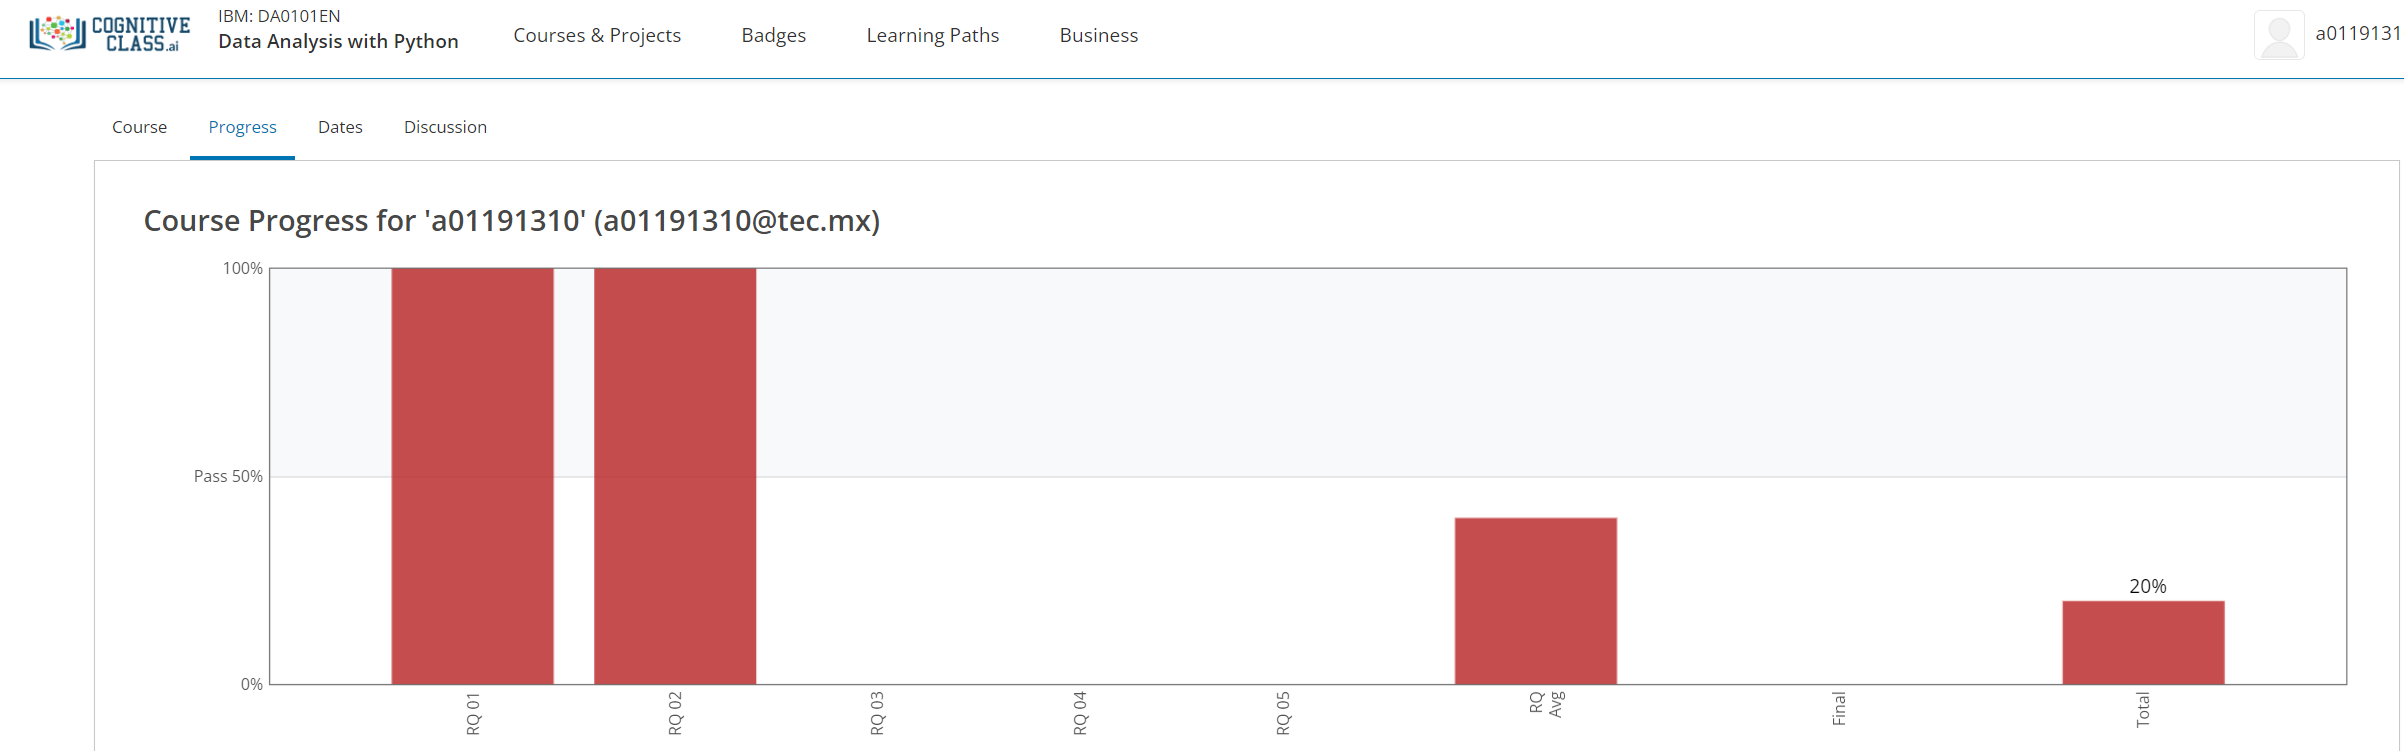